# DSCI 100 Final Project (Individual Component) #
### Mary Leung (34578872) ###

In [2]:
# Install Tidyverse
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players_data <- read_csv("data/players.csv")
players_data
sessions_data <- read_csv("data/sessions.csv")
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


## (1) Description of the Data ##

This data collected collected by PLAI contains information about minecraft players and their playing habits on a server. The data uses these variables:
* <code>experience</code>: Level of experience of the player
* <code>subscribe</code>: Whether the player is subscribed to a game-related newsletter
* <code>hashedEmail</code>: Transformed email address of player that can identify them
* <code>played_hours</code>: Total time spent playing on the server in hours
* <code>name</code>: Name of player
* <code>gender</code>: Gender of player
* <code>Age</code>: Age of player
* <code>start_time</code>: Start date and time of a play session
* <code>end_time</code>: End date and time of a play session
* <code>original_start_time</code>: 



In [4]:
players_summary <- summary(players_data)
players_summary
sessions_summary <- summary(sessions_data)
sessions_summary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## (2) Questions ##

Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific: Can age and time spent playing predict whether a player will subscribe to a game-related newletter in amateur-level players and veteran-level players?

## (3) Exploratory Data Analysis and Visualization ##

### (a) Mean Values of Quantitative Data

In [5]:
players_mean <- players_data |>
    summarize(
        mean_played_hours = mean(played_hours),
        mean_Age = mean(Age, na.rm = TRUE))

sessions_mean <- sessions_data |>
    summarize(
        mean_original_start_time = mean(original_start_time),
        mean_original_end_time = mean(original_end_time, na.rm = TRUE))

data_mean <- players_mean |>
    bind_cols(sessions_mean) |>
    round(2)
data_mean

mean_played_hours,mean_Age,mean_original_start_time,mean_original_end_time
<dbl>,<dbl>,<dbl>,<dbl>
5.85,21.14,1.719201e+12,1.719196e+12


### (b) Relationship between Age of Player, Time Spent Playing, and Newletter Subcription

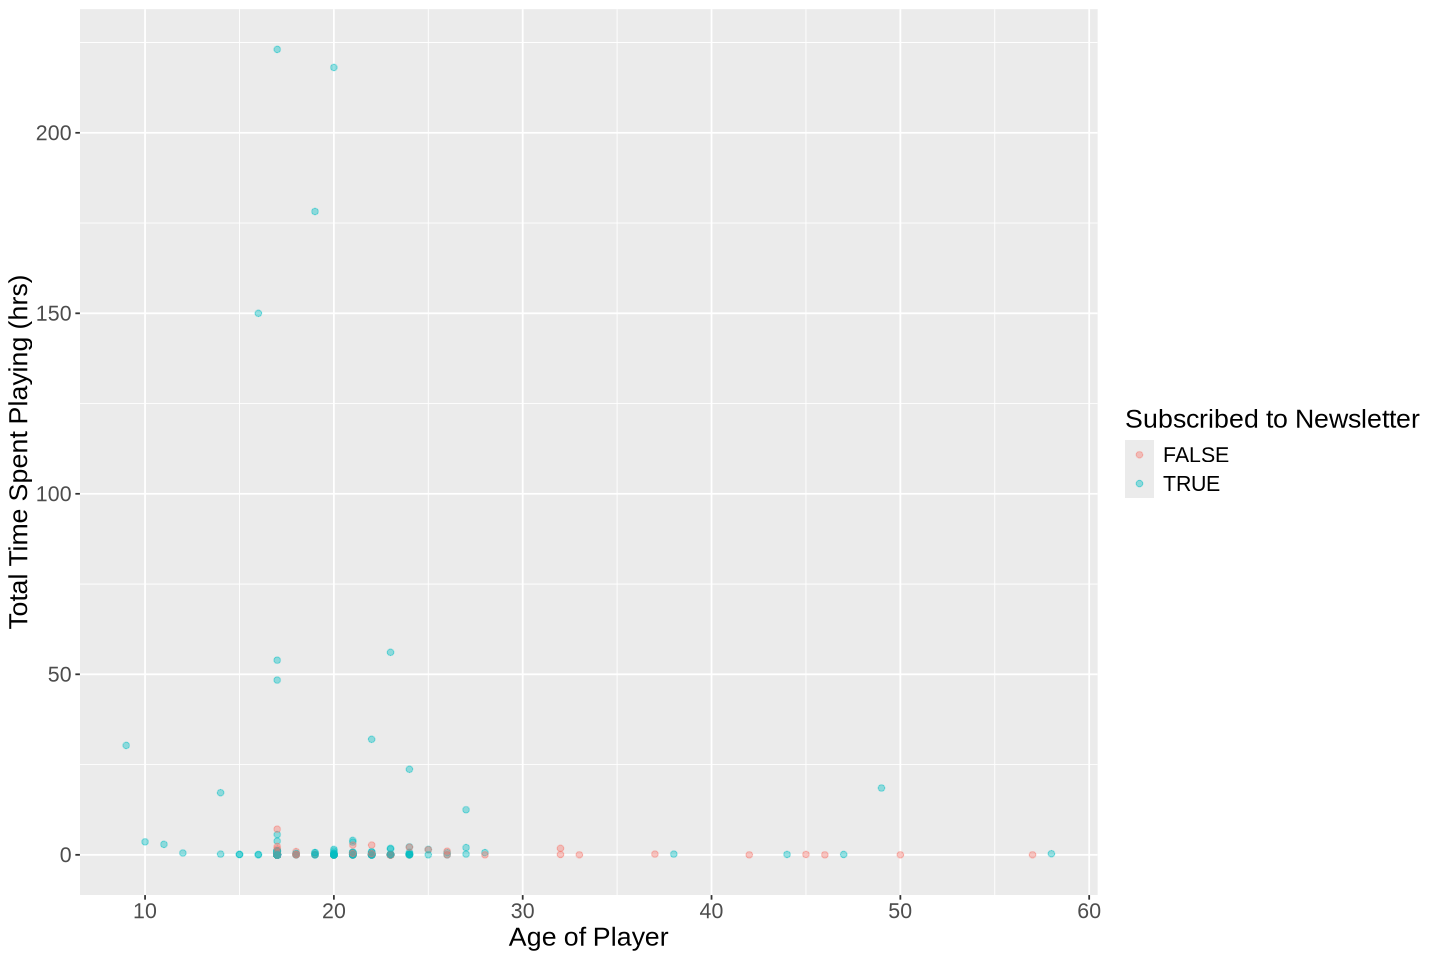

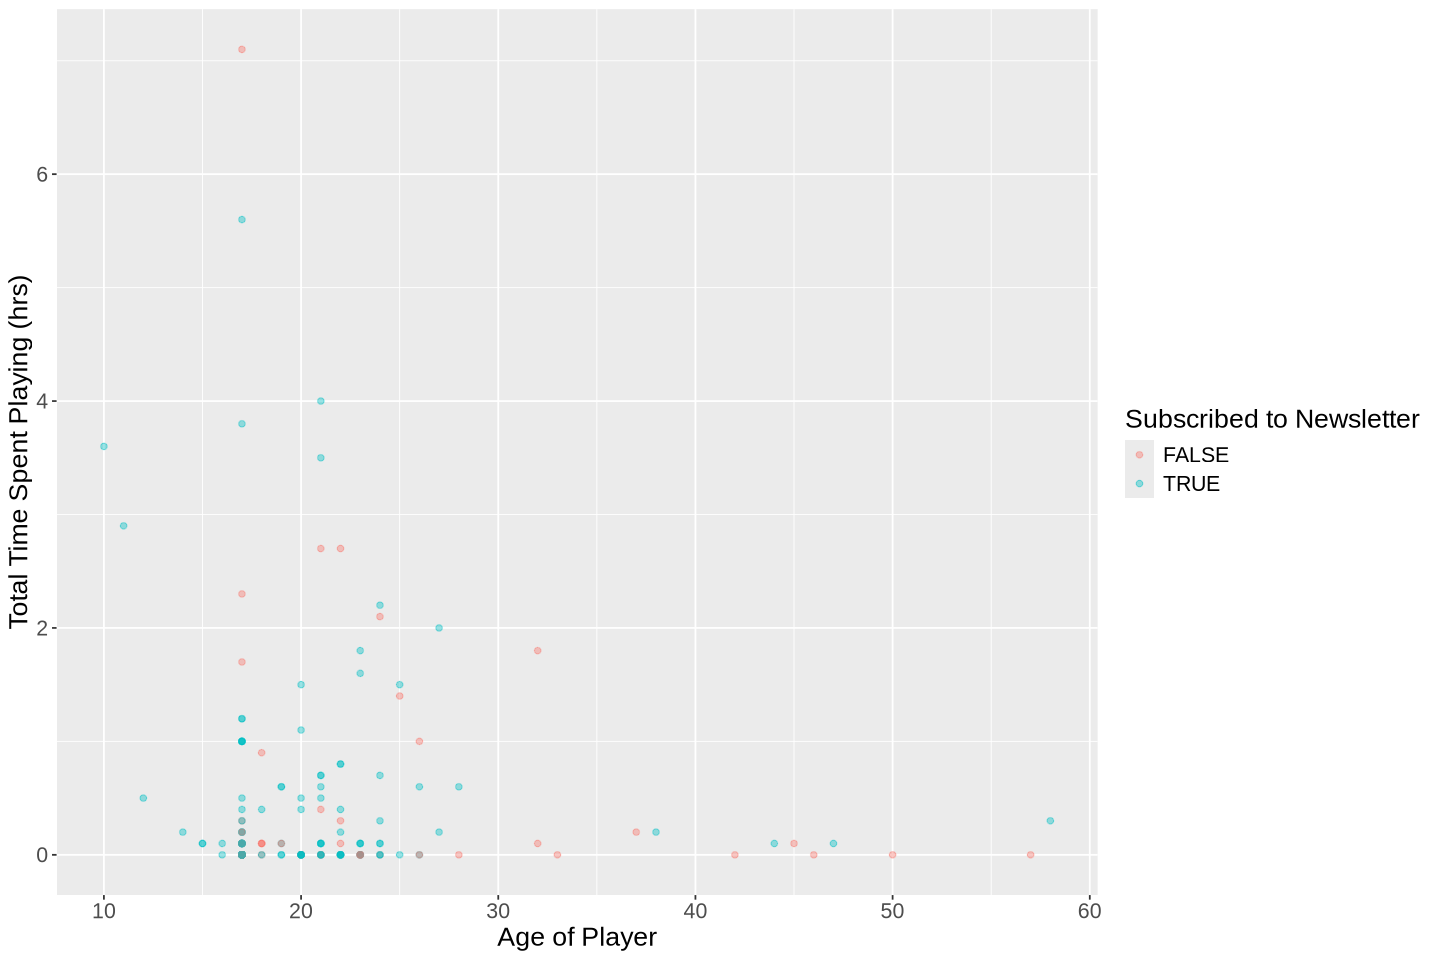

In [62]:
options(repr.plot.height = 8, repr.plot.width = 12)
subscription_time_age_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4, na.rm = TRUE) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 16))
subscription_time_age_plot

subscription_time_age_plot_under_10 <- players_data |>
    filter(played_hours <= 10) |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4, na.rm = TRUE) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 16))
subscription_time_age_plot_under_10

### (c) Relationship between Experience Level of Players and Newsletter Subscription

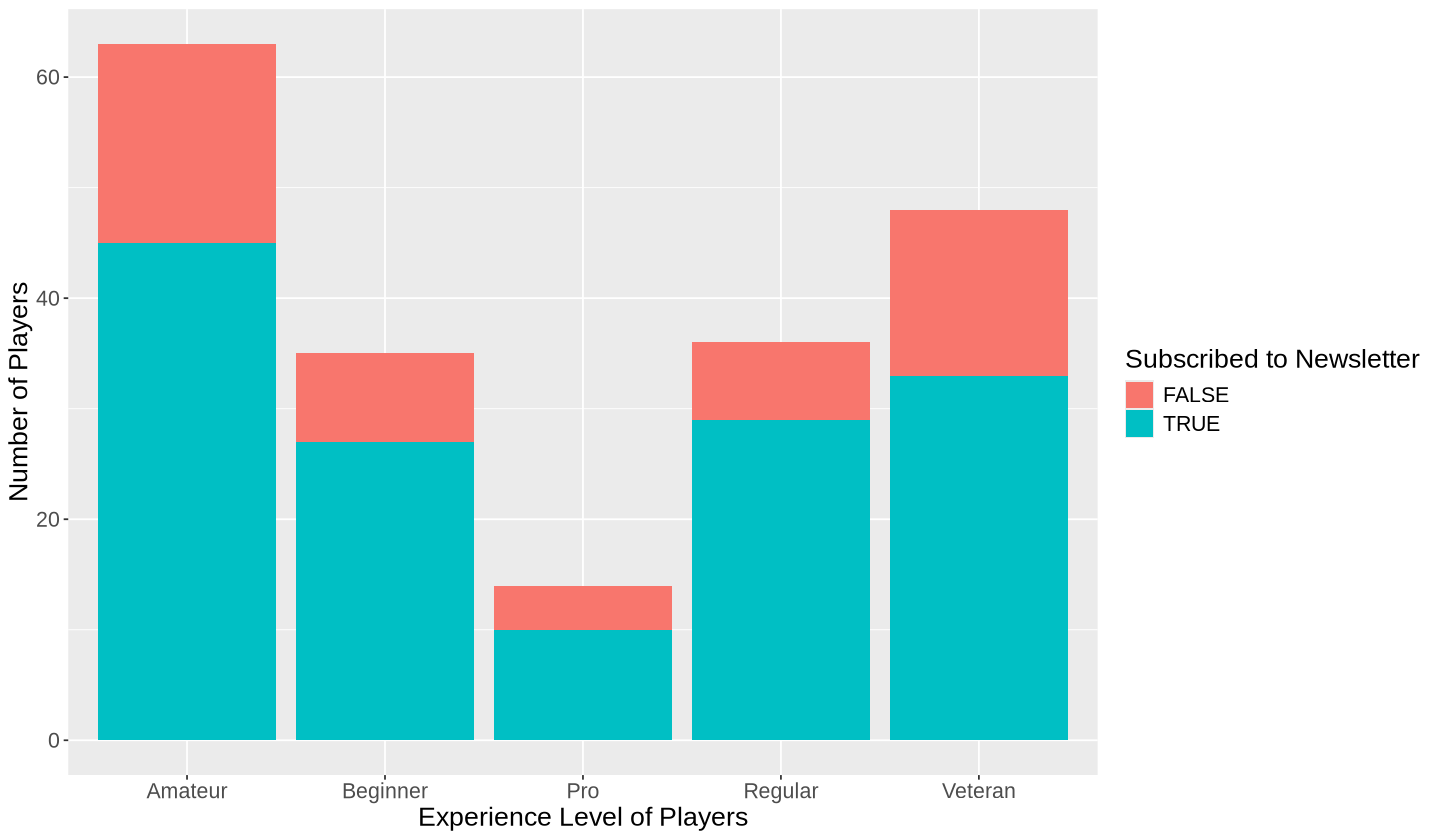

In [29]:
options(repr.plot.height = 7, repr.plot.width = 12)
age_experience_plot <- ggplot(players_data, aes(x = experience, fill = subscribe)) +
    geom_bar(position = "stack", stat = "count") +
    theme(text = element_text(size = 16)) +
    labs(x = "Experience Level of Players", y = "Number of Players", fill = "Subscribed to Newsletter")
age_experience_plot

### (d) Duration of Playing Session

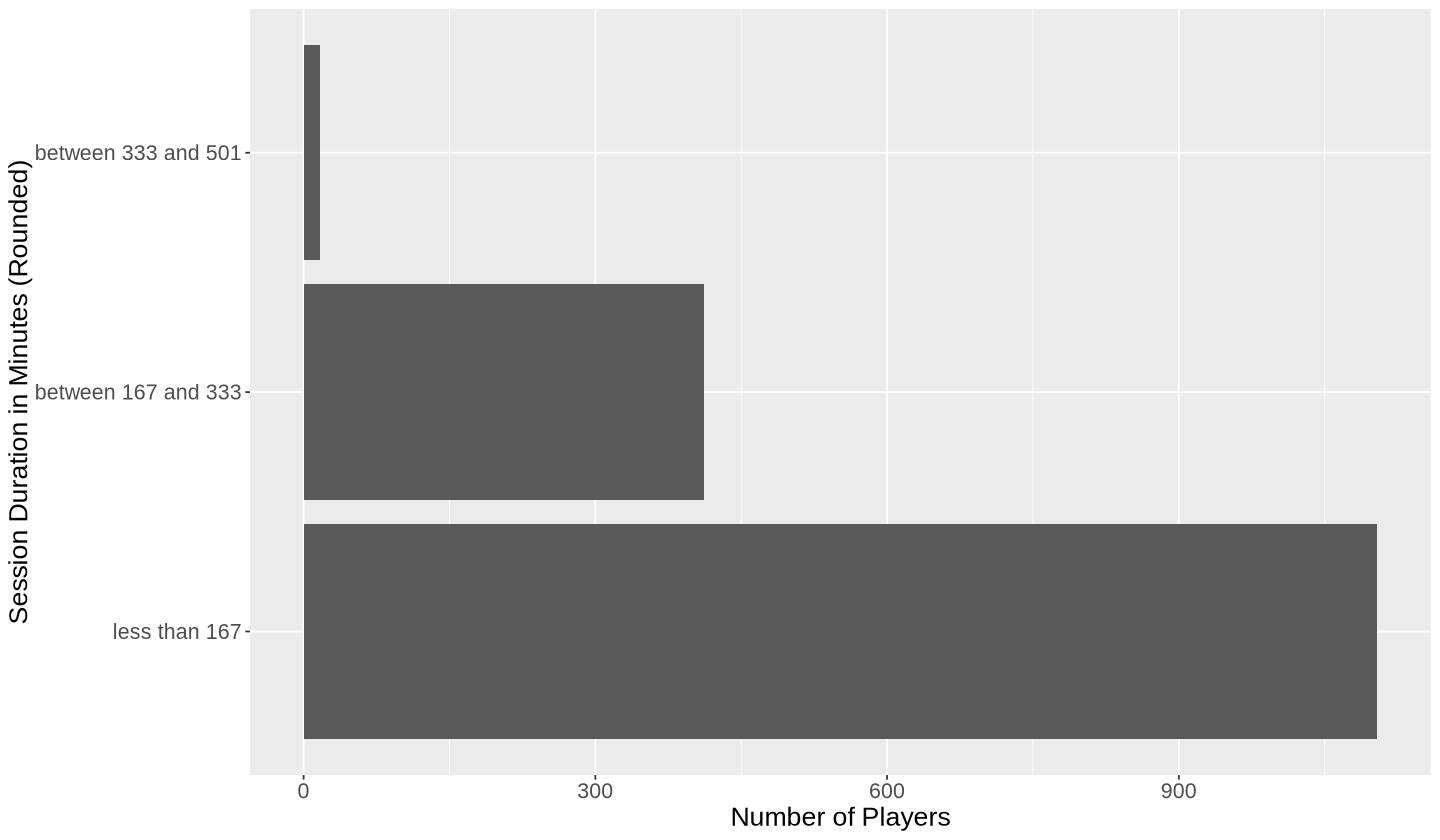

In [78]:
options(repr.plot.height = 7, repr.plot.width = 12)

session_duration <- sessions_data |>
    filter(!is.na(original_end_time)) |>
    mutate(duration_mins = (original_end_time - original_start_time)/60000) |>
    select(duration_mins) |>
    round(0) |>
    mutate(duration_mins = as.factor(duration_mins)) |>
    mutate(duration_mins = fct_recode(duration_mins,
        "less than 167" = "0",
        "between 167 and 333" = "167",
        "between 333 and 501" = "333")) |>
    ggplot(aes(y = duration_mins)) +
        geom_bar(stat = "count", position = "stack") +
        labs(y = "Session Duration in Minutes (Rounded)", x = "Number of Players") +
        theme(text = element_text(size = 16))
session_duration

### (e) Relationship between Age and Newsletter Subscription

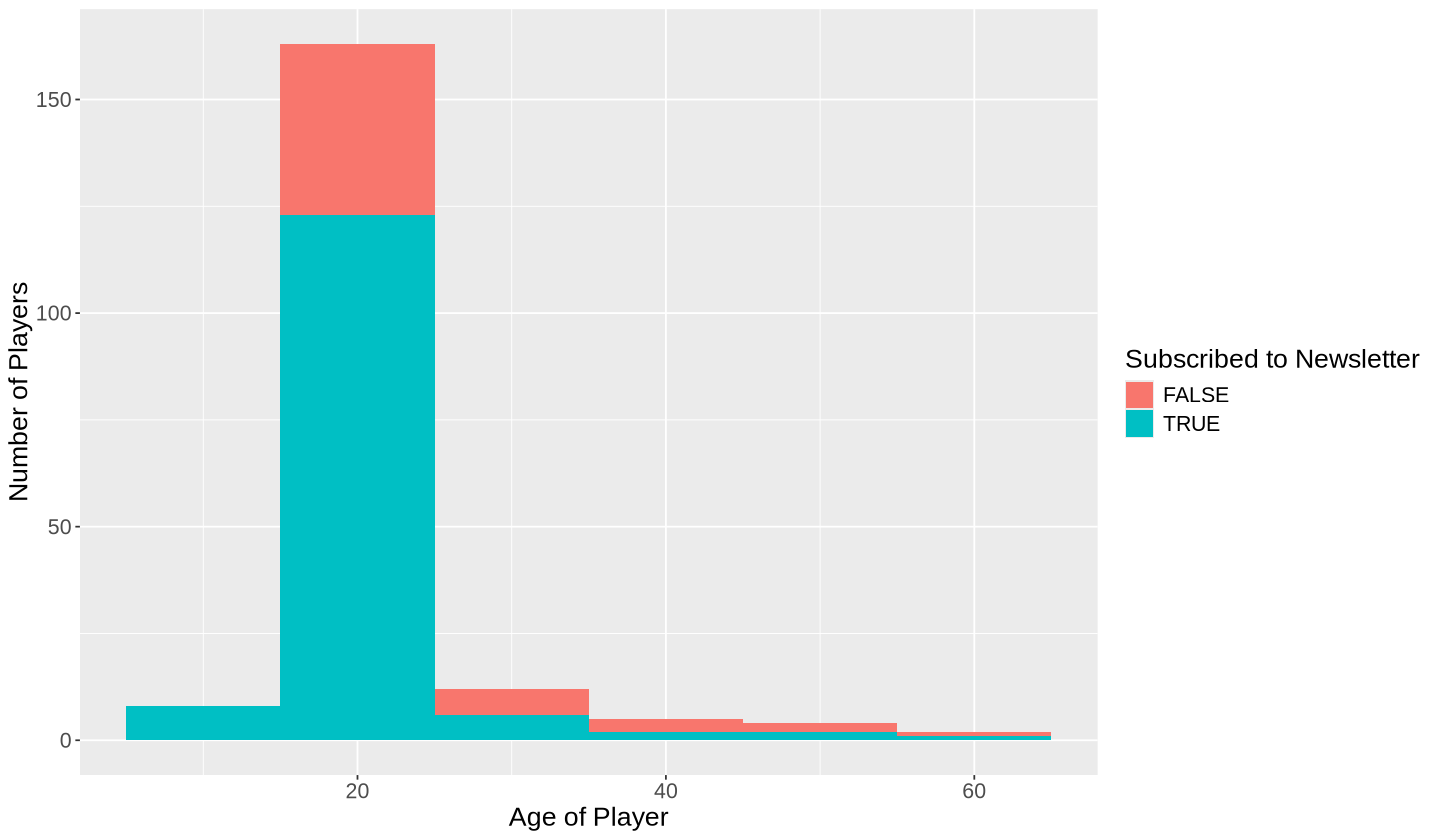

In [76]:
options(repr.plot.height = 7, repr.plot.width = 12)

age_subscribe_histogram <- players_data |>
    filter(!is.na(Age)) |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Age of Player", y = "Number of Players", fill = "Subscribed to Newsletter") +
    theme(text = element_text(size = 16))

age_subscribe_histogram

### (f) Relationship between Age, Experience Level, and Newletter Subscription in Amateurs vs. Veterans

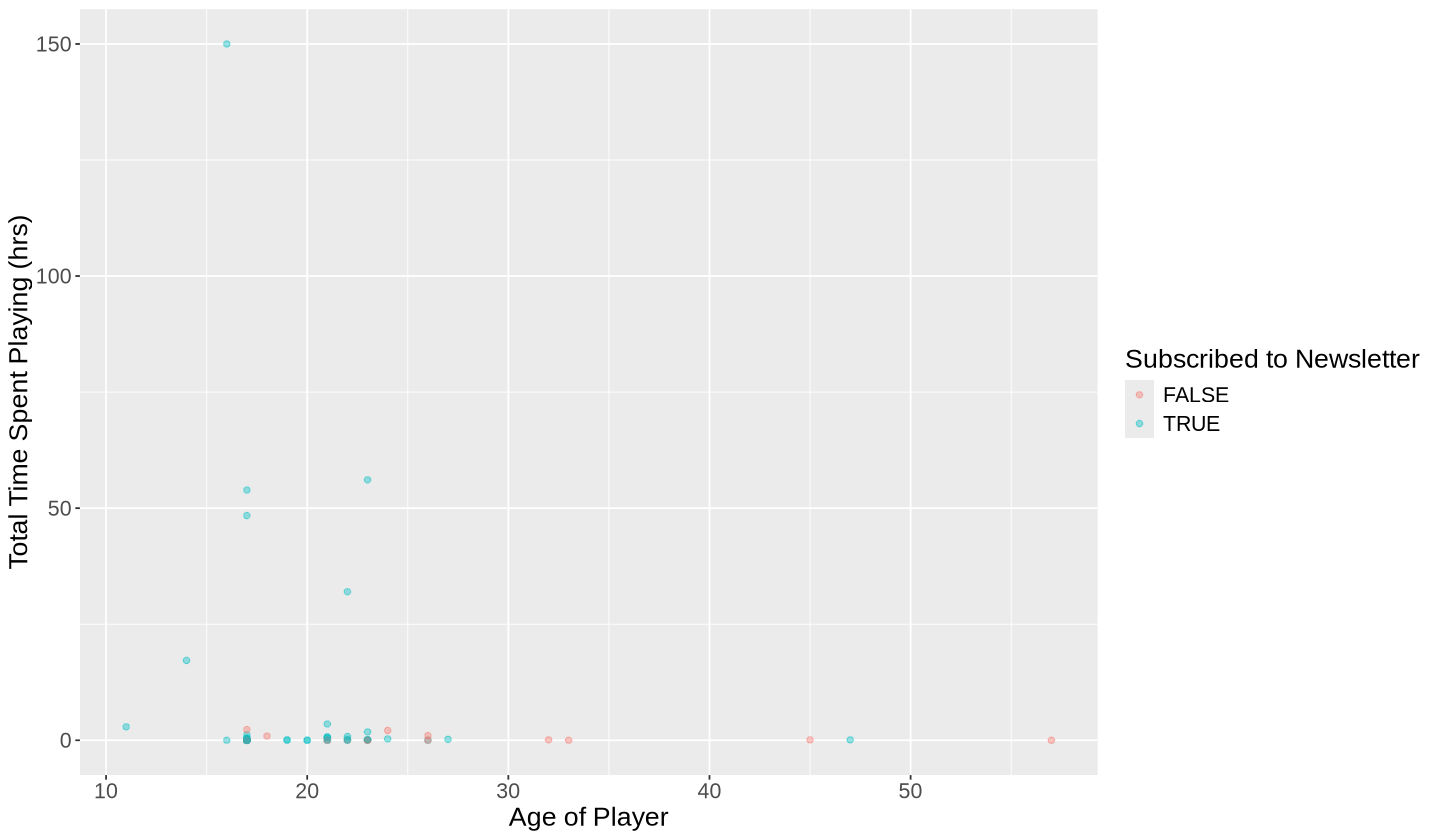

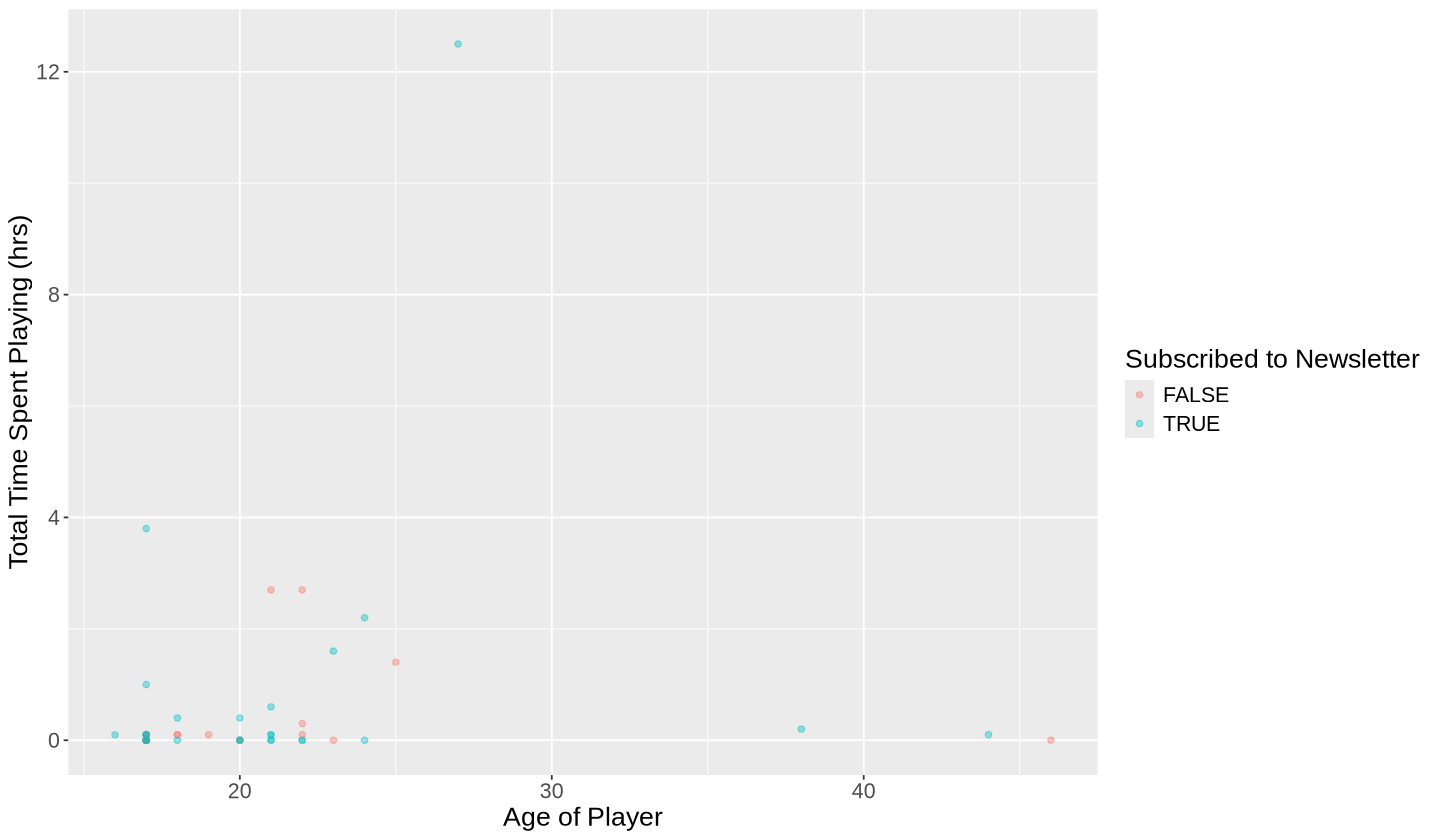

In [92]:
age_played_hours_amateurs_plot <- players_data |>
    filter(experience == "Amateur") |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 16))
age_played_hours_amateurs_plot

age_played_hours_veterans_plot <- players_data |>
    filter(experience == "Veteran") |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Player", y = "Total Time Spent Playing (hrs)", color = "Subscribed to Newsletter") +
    theme(text = element_text(size = 16))
age_played_hours_veterans_plot

## (4) Methods and Plan ##

I plan to...